# Let's test your implementation of KNN 

In [48]:
# import your class on KNN
from KNN import KNN

In [49]:
assert KNN is not None #'KNN should be imported'
assert 'fit' in dir(KNN) and 'predict' in dir(KNN), 'Your implementation should follow the sklearn standards (fit and predict methods)'

# Pick 3 Datasets
Either from the /datasets available in github (which should be familiar from last week) or by directly downloading any 3 datasets from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

# Import Dataset1:

In [ ]:
# Note: If you implemented Knn for one feature and one label only, you will have to trim the dataset.
# BONUS: Extend your Knn Algorithm to be valid for any size of features in your dataset. 
# BONUS2: Create a function in your original knn class to calculate the time it takes to execute from start to finish. 

## Load your data into X and y

In [7]:
# load your data into X and y numpy arrays
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

In [8]:

assert X is not None and type(X) == np.ndarray, 'X should be defined and be a numpy array'
assert y is not None and type(y) == np.ndarray, 'y should be defined and be a numpy array'

## Plot X showing the class

example
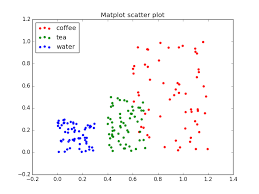

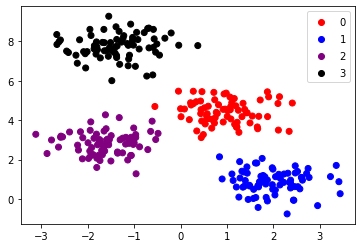

In [36]:
# plot X showing the classes hold in y
from matplotlib.colors import ListedColormap

colors = ListedColormap(['red', 'blue', 'purple', 'black'])

scatter = plt.scatter(X[:,0], X[:,1], c=y, cmap=colors)
plt.legend(*scatter.legend_elements())

## Fit the model

In [37]:
model = KNN(k=3).fit(X, y)

In [38]:
assert model is not None and type(model) == KNN, 'Fit method should return itself'

## Predict the classes for the same data

In [42]:
model.predict()

array([0, 1, 0, 1, 2, 2, 0, 2, 3, 3, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 1,
       1, 2, 1, 3, 2, 3, 2, 1, 3, 3, 3, 2, 0, 3, 1, 2, 2, 1, 2, 3, 0, 3,
       2, 3, 1, 2, 0, 2, 2, 0, 0, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

## Show the decission boundaries depending on K for your model
example
<img src="https://i.stack.imgur.com/ZDVhm.png" width="300"/>
(tricky one so we are going to help you out with this one)

In [61]:
from ipywidgets import interact


@interact
def plot_decision_boundary(n=(1,10,1)):
    model = KNN(k=n).fit(X, y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                         np.arange(y_min, y_max, 0.5))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z)

    for c in set(y):
        plt.scatter(*X[y==c].T)

interactive(children=(IntSlider(value=5, description='n', max=10, min=1), Output()), _dom_classes=('widget-int…

# Repeat this process with Dataset 2 and Dataset 3

# Compare performance vs Sklearn